# Exploratory Data Analysis (EDA) on Retail Sales Data

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [4]:
df = pd.read_csv('retail_sales_dataset.csv')

In [5]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


### Describe Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
df.shape

(1000, 9)

#### Checking null values

In [9]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

#### Visualization 

In [10]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [11]:
df.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

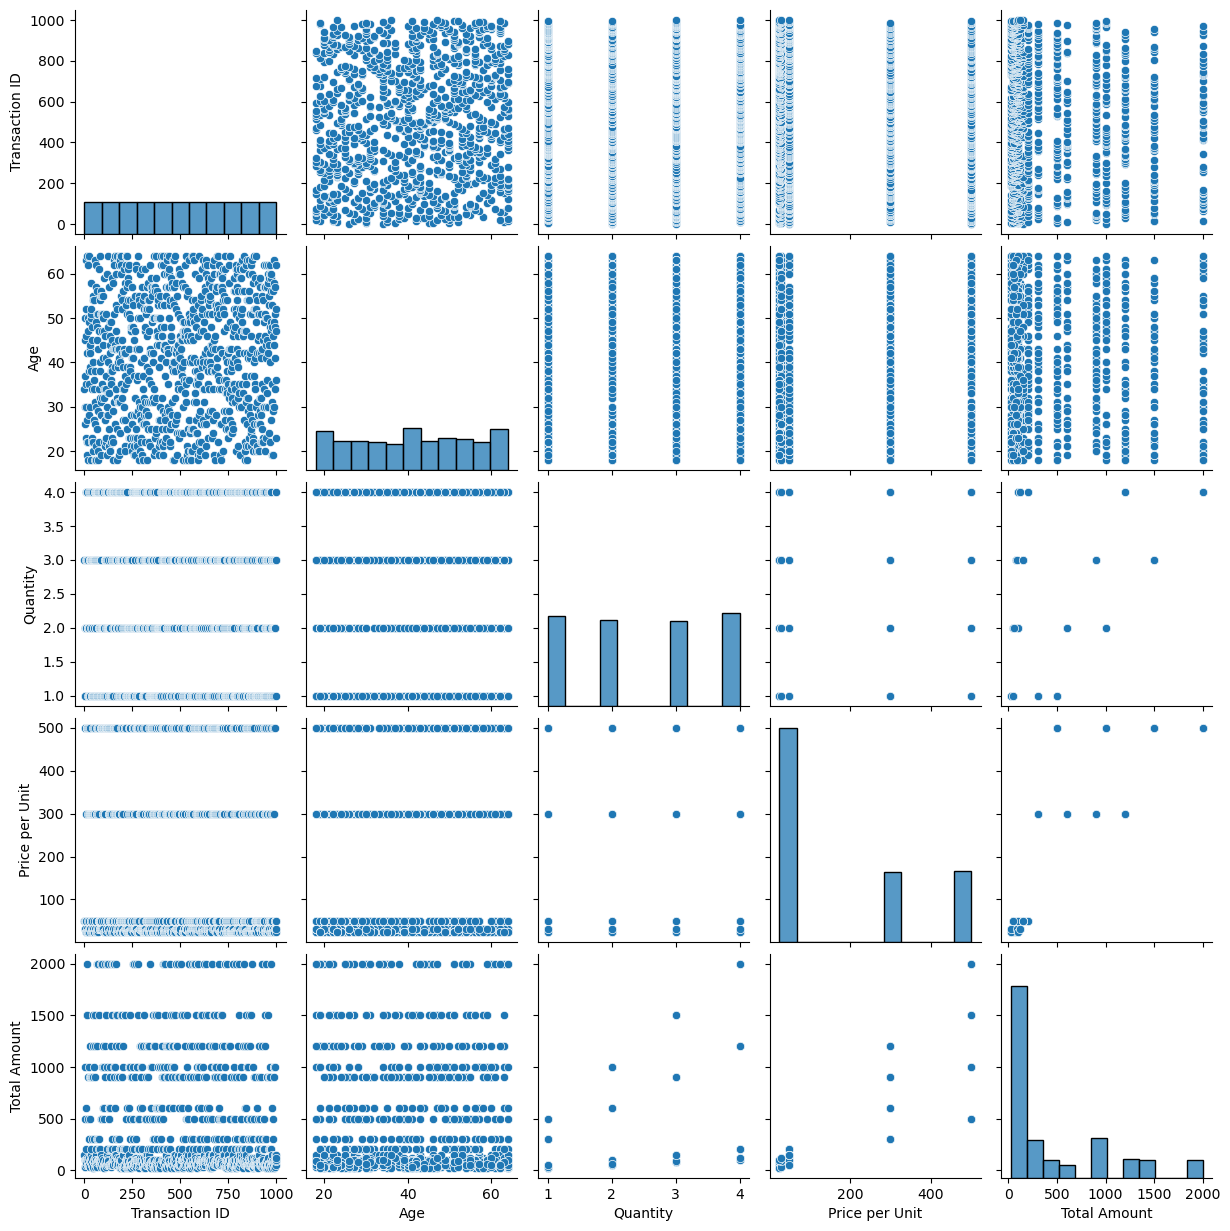

In [12]:
sns.pairplot(df)

#### Subcategory in Product Category

In [13]:
df['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

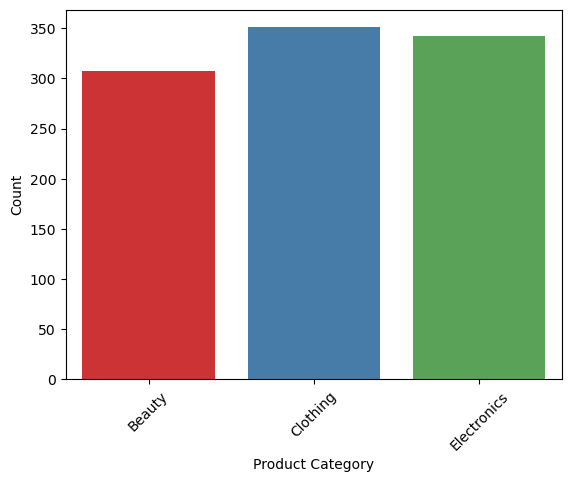

In [14]:
sns.countplot(x=df['Product Category'],palette='Set1')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Product category and summarize it by quantity and total amount

In [15]:
df.groupby('Product Category')[['Quantity','Total Amount']].sum()

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


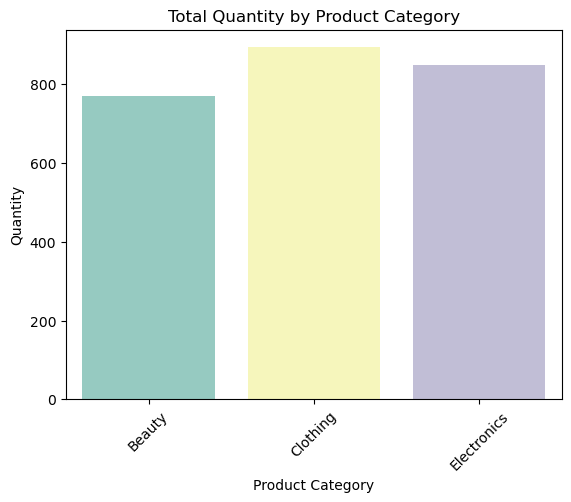

In [16]:
cat_sum = df.groupby('Product Category')[['Quantity','Total Amount']].sum()
sns.barplot(x=cat_sum.index, y=cat_sum['Quantity'],palette='Set3')
plt.title('Total Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

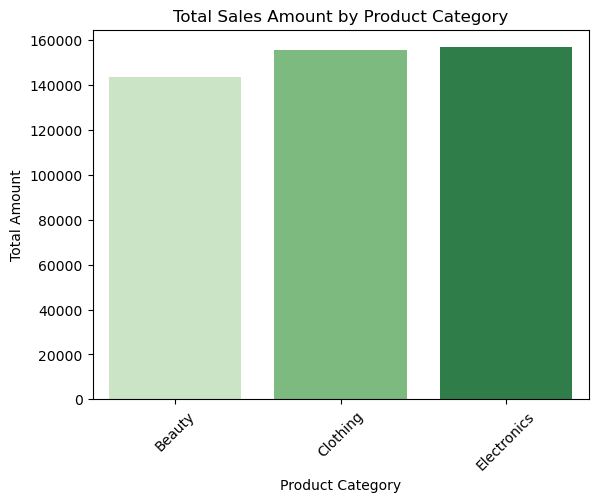

In [17]:
cat_sum = df.groupby('Product Category')[['Quantity','Total Amount']].sum()
sns.barplot(x=cat_sum.index, y=cat_sum['Total Amount'],palette='Greens')
plt.title('Total Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

#### Product Category-wise Sales Share

<Axes: ylabel='Total Amount'>

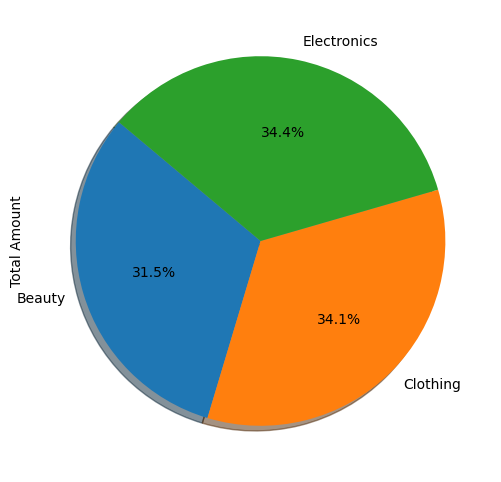

In [18]:
df.groupby('Product Category')['Total Amount'].sum().plot(kind='pie',
        autopct='%1.1f%%', figsize=(7,6),shadow=True,startangle=140)


#### Product Category Quantity wise Share

<Axes: ylabel='Quantity'>

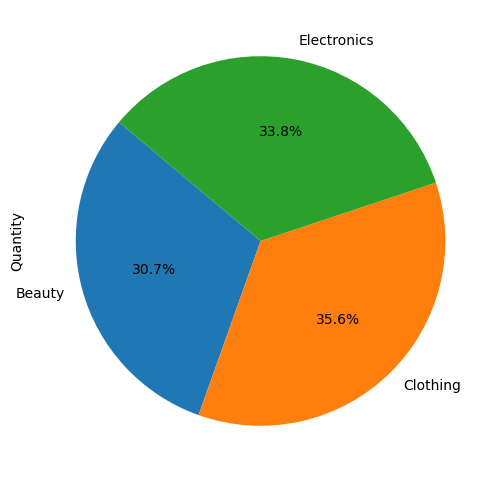

In [19]:
df.groupby('Product Category')['Quantity'].sum().plot(kind='pie', 
            autopct='%1.1f%%', figsize=(7,6),startangle=140)


#### Splilting the dates into day/month/year

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Month']

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object

#### Total Sales Trends Each Months

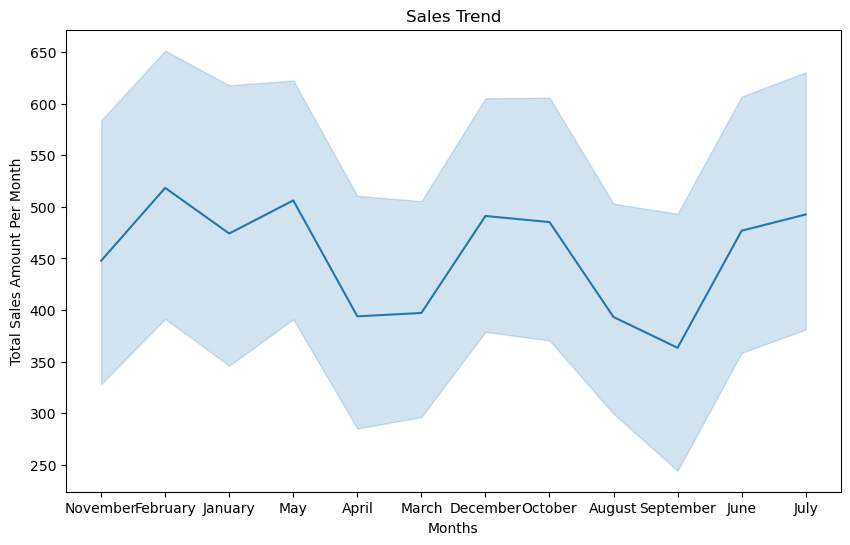

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Month',y='Total Amount',data=df)
plt.title('Sales Trend')
plt.xlabel('Months')
plt.ylabel('Total Sales Amount Per Month')
plt.show()

#### Transaction Trends

In [22]:
transaction_count = df.groupby('Month')['Transaction ID'].count()

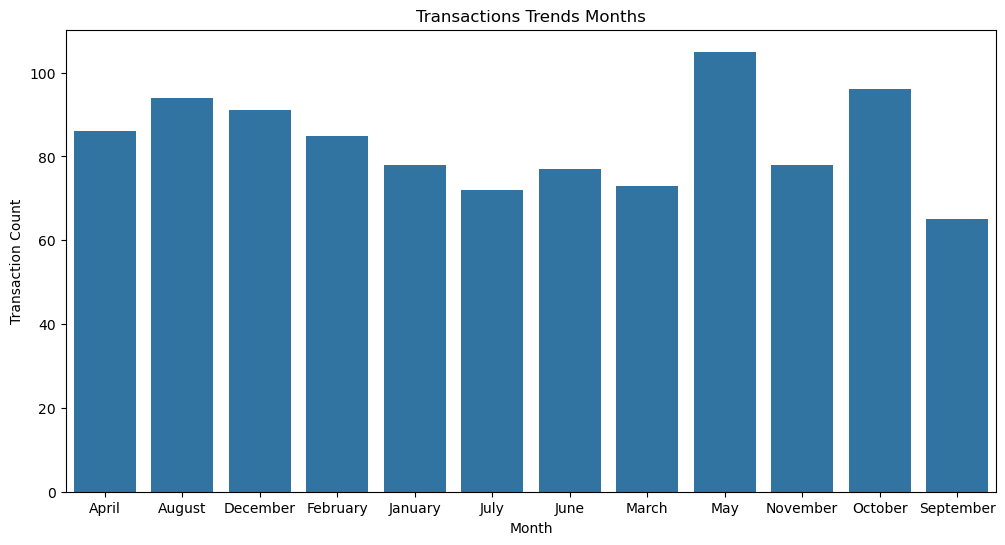

In [23]:
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(12,6))
sns.barplot(x=transaction_count.index,y=transaction_count.values)
plt.title('Transactions Trends Months')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.show()


#### Heatmap of Sales

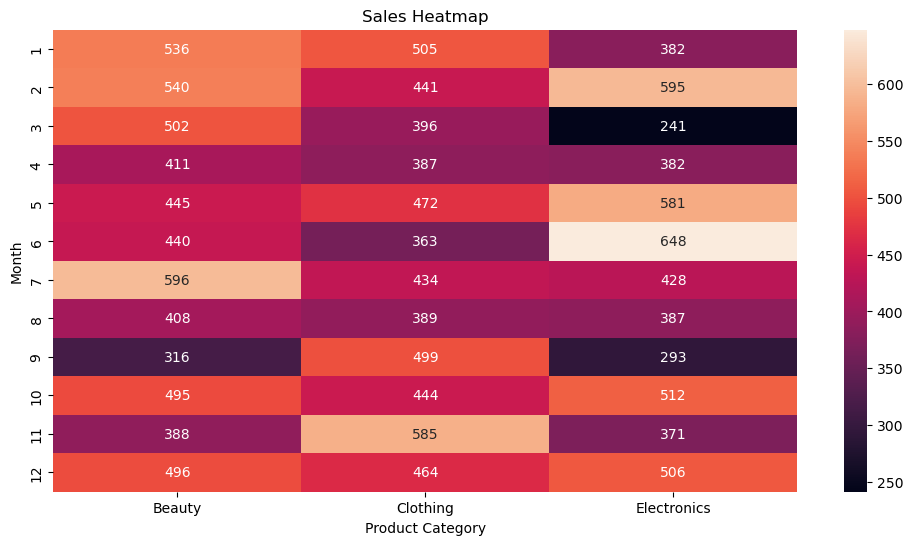

In [24]:
heatmap = df.pivot_table(index='Month',columns='Product Category',values='Total Amount')
plt.figure(figsize=(12,6))
sns.heatmap(heatmap,annot=True,fmt='.0f')
plt.title('Sales Heatmap')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

#### Gender Wise Data

In [25]:
df['Age'].count()

np.int64(1000)

In [26]:
df[df['Gender'].isin(['Male','Female'])]['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

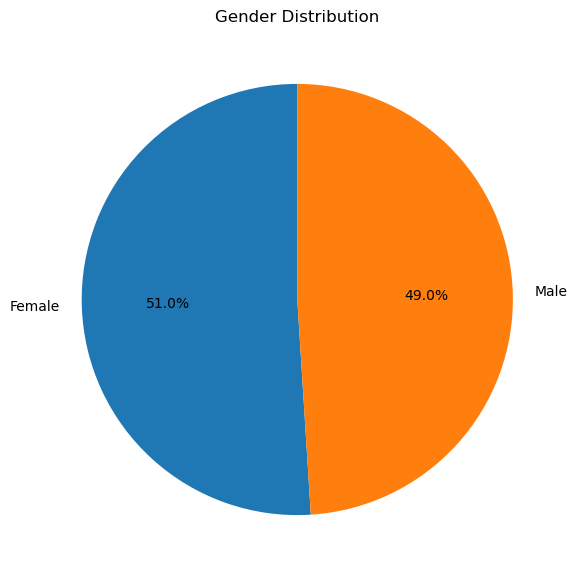

In [27]:
gender_counts = {'Female':510,'Male':490}
plt.figure(figsize=(7,7))
plt.pie(gender_counts.values(),labels=gender_counts.keys(),autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()

### Descriptive Statistics

In [28]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,Month
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,6.549000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,1.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,4.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,6.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,10.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,12.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,3.452755


#### Key Insights

Wide variation in Total Amount

Quantity mostly small → retail-style transactions

Age range shows diverse customer base

#### Time Series Analysis (Sales Trend)
Monthly Sales Trend

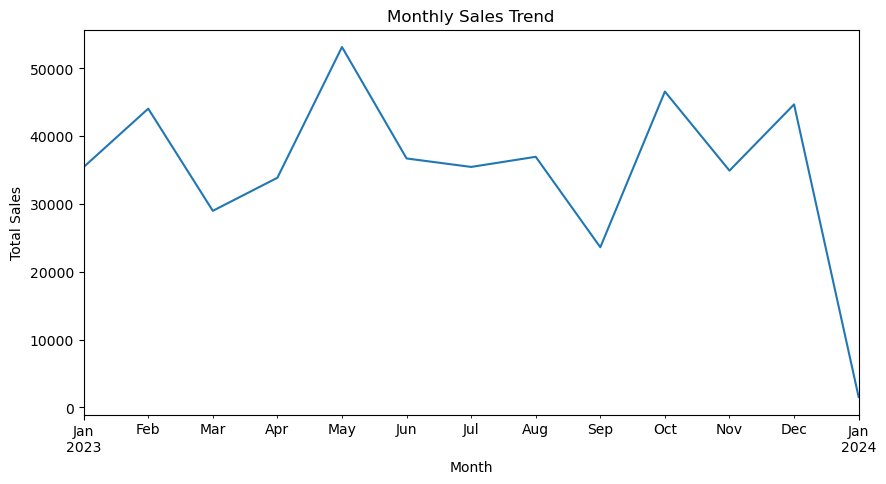

In [29]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Total Amount'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


#### Insight:

Clear seasonality visible

Some months outperform others → promotion or festive impact

#### Product Analysis
 Sales by Product Category

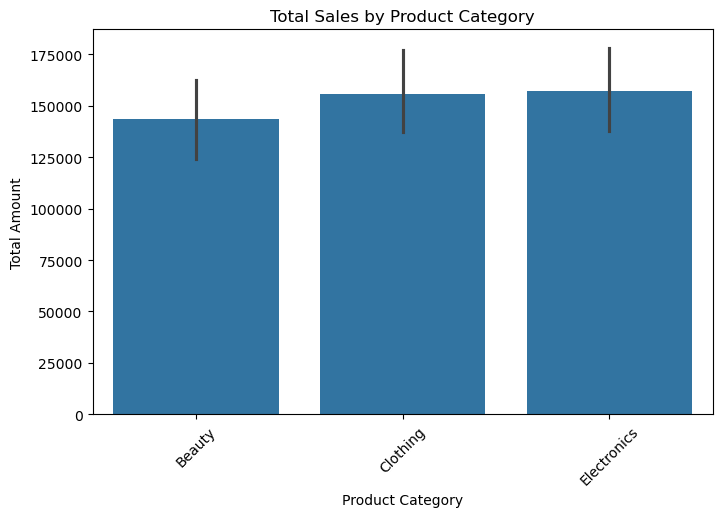

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()


#### Quantity Sold per Category

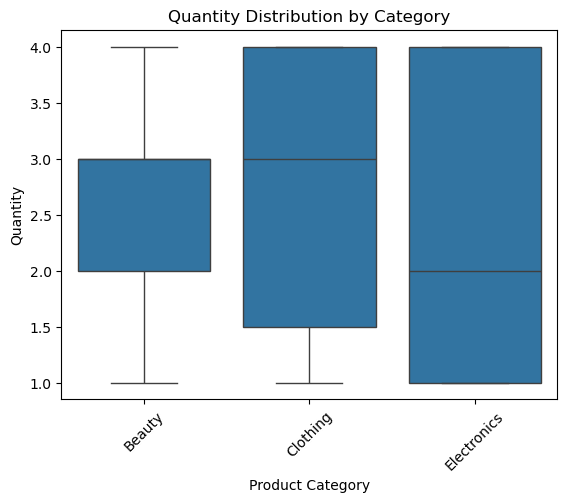

In [31]:
sns.boxplot(x='Product Category', y='Quantity', data=df)
plt.title('Quantity Distribution by Category')
plt.xticks(rotation=45)
plt.show()


#### Customer Analysis
Gender-wise Spending

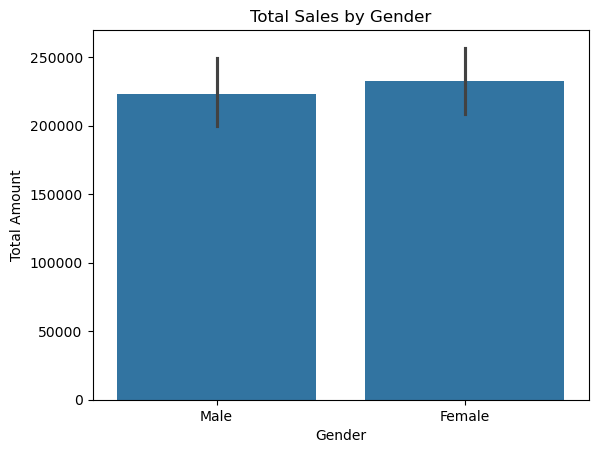

In [32]:
sns.barplot(x='Gender', y='Total Amount', data=df, estimator=sum)
plt.title('Total Sales by Gender')
plt.show()


#### Age vs Spending

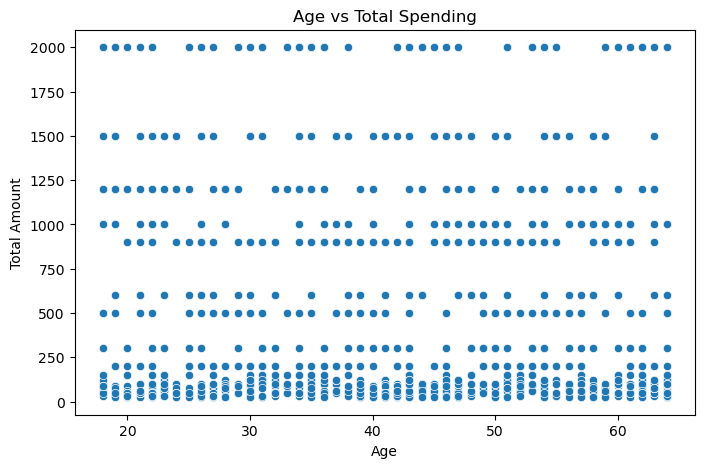

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Total Amount', data=df)
plt.title('Age vs Total Spending')
plt.show()


##### Correlation Analysis (Heatmap)

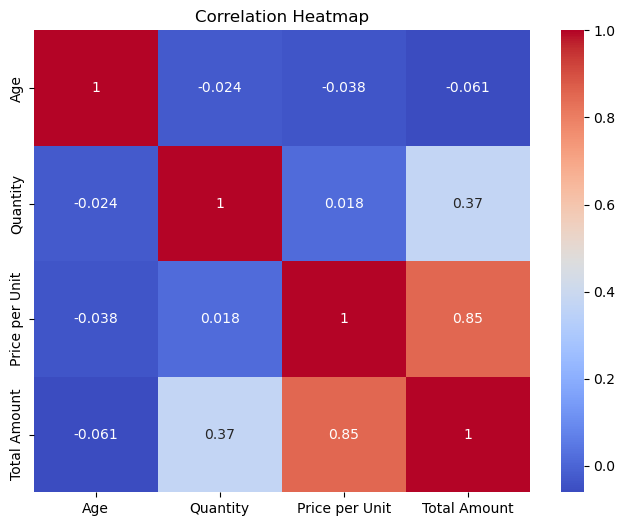

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','Quantity','Price per Unit','Total Amount']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##### Observations

Total Amount strongly depends on:

Quantity

Price per Unit

Age weakly correlated → spending driven by product, not age

##### Observations

Total Amount strongly depends on:

Quantity

Price per Unit

Age weakly correlated → spending driven by product, not age

# Description

Conducted exploratory data analysis on retail sales data to uncover time-based sales trends, customer purchasing behavior, and product performance. Applied data cleaning, descriptive statistics, time-series analysis, and visualization techniques using Python, Pandas, Matplotlib, and Seaborn. Delivered actionable insights to support inventory planning, targeted marketing, and revenue optimization.

# Completed